# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import timeit
from homework import spare_matrix_Abt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
m, n = 50, 12

# Sposób 1 rozwiązania
A, b = spare_matrix_Abt(m, n)
A_tran, b_tran = main.square_from_rectan(A, b)
result_1 = np.linalg.solve(A_tran, b_tran)
residuum_1 = main.residual_norm(A_tran, result_1, b_tran)
print(residuum_1, '\n', result_1)


4.249355965379808e-14 
 [ 9.99999974e-01  7.58007725e-06 -8.00028383e+00  4.16142769e-03
  1.06350033e+01  1.42016479e-01 -6.09002552e+00  7.37605224e-01
  7.31350261e-01  7.15476403e-01 -6.70528222e-01  1.41573277e-01]


In [3]:
%%timeit -n 10 -r 10
result_1 = np.linalg.solve(A_tran, b_tran)
residuum_1 = main.residual_norm(A_tran, result_1, b_tran)

21.6 µs ± 10.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [4]:
# Sposób 2 rozwiązania
result_2 = np.linalg.lstsq(A, b, rcond=None)
residuum_2 = main.residual_norm(A_tran, result_2, b_tran)
print(residuum_2,"\n", result_2)

None 
 (array([ 1.00000000e+00, -4.22743382e-07, -7.99998124e+00, -3.18763318e-04,
        1.06694308e+01, -1.38202899e-02, -5.64707562e+00, -7.53160319e-02,
        1.69360697e+00,  6.03210332e-03, -3.74241701e-01,  8.80405757e-02]), array([6.39864748e-17]), 12, array([9.62053562e+00, 4.52612011e+00, 1.56672346e+00, 4.56426886e-01,
       1.15501304e-01, 2.55790765e-02, 4.95112191e-03, 8.30834463e-04,
       1.18913555e-04, 1.40943278e-05, 1.30654698e-06, 8.21021340e-08]))


In [5]:
%%timeit -n 10 -r 10
result_2 = np.linalg.solve(A_tran, b_tran)
residuum_2 = main.residual_norm(A_tran, result_2, b_tran)

19.5 µs ± 4.05 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [8]:
# Sposób 3 rozwiązania
q, r = np.linalg.qr(A)
result_3 = sp.linalg.solve_triangular(r, q.T@b)
residuum_3 = main.residual_norm(r, result_3, q.T@b)
print(residuum_3,"\n", result_3)

1.5859737849776556e-15 
 [ 1.00000000e+00 -4.22743397e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210127e-03 -3.74241700e-01  8.80405756e-02]


In [10]:
%%timeit -n 10 -r 10
q, r = np.linalg.qr(A)
result_3 = sp.linalg.solve_triangular(r, q.T@b)
residuum_3 = main.residual_norm(r, result_3, q.T@b)

79.6 µs ± 29.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [11]:
# Sposób 4 rozwiązania
[U, s, V] = np.linalg.svd(A, full_matrices = False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S, U.T@b)
residdum_usv = main.residual_norm(A, c, b)
print(residdum_usv, "\n", result_3)

7.999154178181067e-09 
 [ 1.00000000e+00 -4.22743397e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210127e-03 -3.74241700e-01  8.80405756e-02]


In [12]:
%%timeit -n 10 -r 10
[U, s, V] = np.linalg.svd(A, full_matrices = False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S, U.T@b)

61.2 µs ± 33.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [ ]:
# Z przeprowadzonych powyżej testów widać że moetoda solve jest najszybsza

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


Równanie regresji liniowej: y = 0.79x + -3.50
Współczynnik korelacji: 0.9750


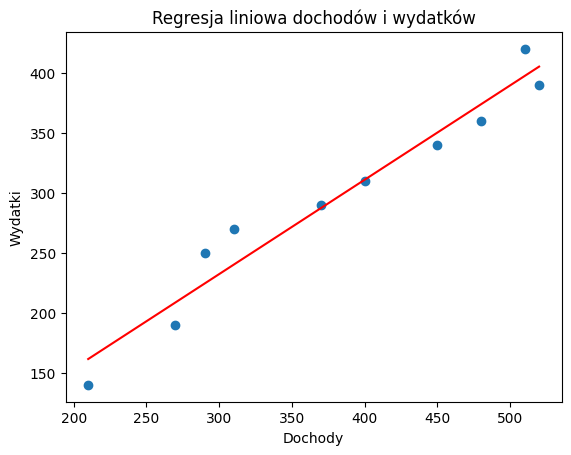

In [45]:
x1 = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520]) # dochody
x2 = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390]) # wydatki

n = len(x1)
x_mean = np.mean(x1)
y_mean = np.mean(x2)

numerator = np.sum((x1 - x_mean) * (x2 - y_mean))
denominator = np.sum((x1 - x_mean) ** 2)
a = numerator / denominator
b = y_mean - a * x_mean

print(f"Równanie regresji liniowej: y = {a:.2f}x + {b:.2f}")
correlation_coefficient = np.corrcoef(x1, x2)[0][1]
print(f"Współczynnik korelacji: {correlation_coefficient:.4f}")
# jak widac współczynnik korelacji jest równy 

y = x1 * a + b

plt.plot(x1, y, 'r')
plt.scatter(x1, x2)
plt.title("Regresja liniowa dochodów i wydatków")
plt.xlabel("Dochody")
plt.ylabel("Wydatki")
plt.show()



***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj trzy wektory $x_1$, $x_2$ oraz $\epsilon$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.
2. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$
- $x_1$, $x_2$ i $x_1 * x_2$

z parametrem *axis = 1*. To zadanie jest przygotowaniem struktury danych potrzebnych przy regresji liniowej w dalszej części zadania.


3. Na podstawie wektoró z punktu 1 wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x_1-0.5x_2+\epsilon
$$

Dla lepszego zobrazowania problemu należy spojrzeć na niego w sposób następujący:
 - $y$ - proces który chcemy w dalszej części zadania zamodelować, a którego dokładnego opisu nie znamy
 - $x_1, x_2$ - zmienne niezależne które jesteśmy w stanie mierzyć i wiemy że wpływają na proces
 - $\epsilon$ - zakłócenie procesu




4. W zależności od możliwości pomiaru zmiennych niezależnych można podjąć próbę zamodelowania procesu, na potrzeby ćwiczenia wykorzystana zostanie [regresja liniowa](https://pl.wikipedia.org/wiki/Regresja_liniowa). Zakładając że dostępne dane to wektor wartości $y$ i odpowiednio wektor $x_1$ lub $x_2$ do obliczenia jej współczynników można użyć rozkładu QR. Aby to zrobić należy przyjąć hipotetyczny model procesu (wzory 1-4) i potraktować "zmierzone" i podstawione do wzoru dane jako układ równań

 Korzystając z macierzy z punktu 3 oblicz współczynniki regresji liniowej z wykorzystaniem rozkładu QR, dla  modeli procesu opisanych w następujacy sposób:

 $$ \hat{y} \sim a + z_1 + z_2 + ... + z_n$$
 Gdzie:
 - $\hat{y}$ - przybliżenie modelowanego procesu
 - $a$ - wyraz wolny
 - $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model

Celem regresji jest dobranie takich współczynników zmiennych niezależnych i wyrazu wolnego, aby zaproponowany model jak najbliżej odwzorowywał pierwotny procecs.


Modele do przeprowadzenia eksperymentów:
 1. $\hat{y}\sim a+x_1$   
 2. $\hat{y}\sim a+x_2$
 3. $\hat{y}\sim a+x_1+x_2$
 4. $\hat{y}\sim a+x_1+x_2+x_1*x_2$

  
5. Przeanalizuj (znanymi metrykami) i przedstaw otrzymane wyniki na odpowiednich subplotach.

In [3]:
x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))

ones = np.ones((100, 1))

x_con1 = np.concatenate((ones, x1), axis=1)
x_con2 = np.concatenate((ones, x2), axis=1)
x_con3 = np.concatenate((ones, x1, x2), axis=1) 
x_con4 = np.concatenate((ones, x1, x2, x1*x2), axis=1)

epsilion = np.random.normal(0, 1, (100, 1))
y = 2 + x1 - 0.5 * x2 + epsilion

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

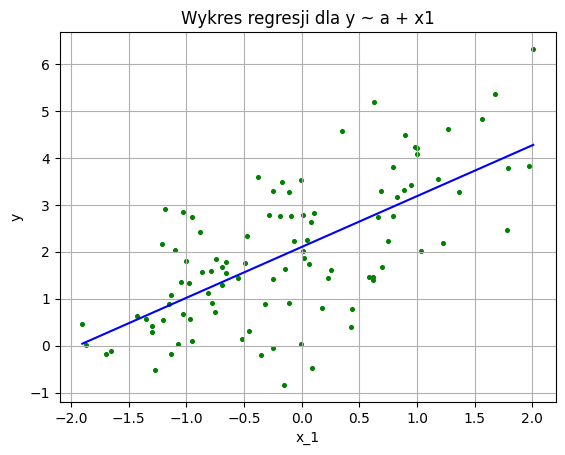

In [4]:
# 1
q, r = np.linalg.qr(x_con1)
beta = sp.linalg.solve_triangular(r, q.T@y)

y_approx = beta[0] + beta[1] * pred1

plt.scatter(x1, y, s = 7, c = "g")
plt.plot(pred1, y_approx, "b")
plt.title("Wykres regresji dla y ~ a + x1")
plt.xlabel("x_1")
plt.ylabel("y")
plt.grid()
plt.show()

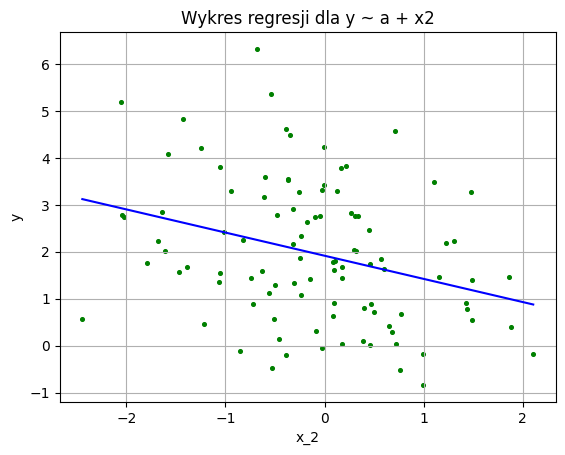

In [5]:
# 2
q, r = np.linalg.qr(x_con2)
beta = sp.linalg.solve_triangular(r, q.T@y)

y_app = beta[0] + beta[1] * pred2

plt.scatter(x2, y, s = 7, c = "g")
plt.plot(pred2,y_app, "b")
plt.title("Wykres regresji dla y ~ a + x2")
plt.xlabel("x_2")
plt.ylabel("y")
plt.grid()
plt.show()

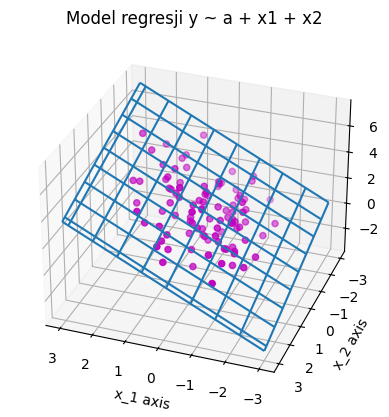

In [6]:
# 3
q, r = np.linalg.qr(x_con3)
beta = sp.linalg.solve_triangular(r, q.T@y)
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
X = x1
Y = x2
Z = y
ax.scatter(X, Y, Z, c = 'm', marker = "o")
ax.set_xlabel("x_1 axis")
ax.set_ylabel("x_2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x1 + x2")
plt.grid()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = beta[0] + beta[1] * X + beta[2] *  Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(30,110)
plt.show()

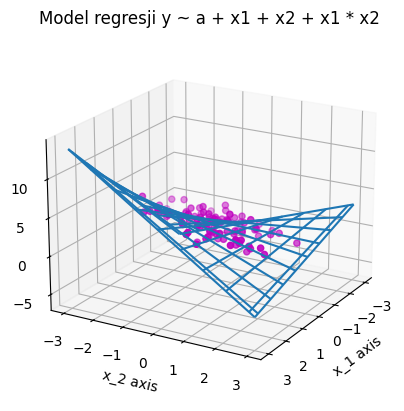

In [22]:
# 4
q, r = np.linalg.qr(x_con4)
beta = sp.linalg.solve_triangular(r, q.T@y)
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
X = x1
Y = x2
Z = y
ax.scatter(X, Y, Z, c = 'm', marker = "o")
ax.set_xlabel("x_1 axis")
ax.set_ylabel("x_2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x1 + x2 + x1 * x2")
plt.grid()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = beta[0] + beta[1] * X + beta[2] * Y + beta[1] * beta[2] * X * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(20, 30)
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)